In [3]:
import sys
!{sys.executable} -m pip install librosa

     |████████████████████████████████| 1.6 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 323 kB 1.9 MB/s eta 0:00:01
  Created wheel for librosa: filename=librosa-0.7.2-py3-none-any.whl size=1612883 sha256=63cb4737440c8681ba6913236e4b6e4a2addf30d005363c12064d34bc1ae0164
  Stored in directory: /home/ksh40/.cache/pip/wheels/18/9e/42/3224f85730f92fa2925f0b4fb6ef7f9c5431a64dfc77b95b39
  Created wheel for audioread: filename=audioread-2.1.8-py3-none-any.whl size=23091 sha256=f7b1f85c224373f83ecc76596c5b2aceefc5473c799f2d5c78a5d6ccdb863801
  Stored in directory: /home/ksh40/.cache/pip/wheels/cd/85/04/704a589ef8773d1ec1393c4b271a023f929d85ef5317b12d8c
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320720 sha256=1d6a64009a9f78d65c028387dbac22e389d804594d5ae960902c7c19b16850c5
  Stored in directory: /home/ksh40/.cache/pip/wheels/a0/18/0a/8ad18a597d8333a142c9789338a96a6208f1198d290ece356c
Successfully built librosa audioread resampy


In [4]:
import librosa

In [5]:
audio_data = '../DeepLearningMusic/kalyani/1.wav'
x, sr = librosa.load(audio_data)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


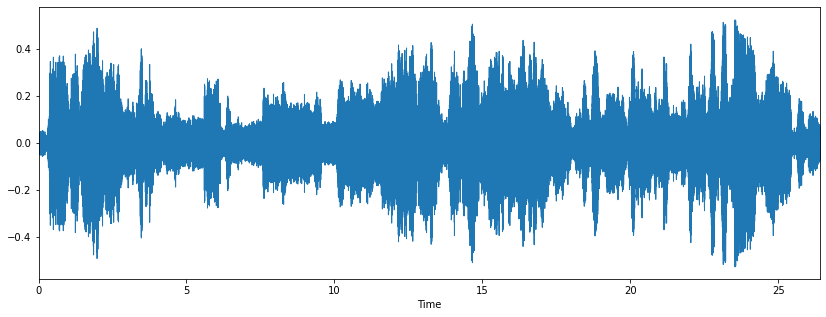

In [7]:
#Visualize an audio file
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

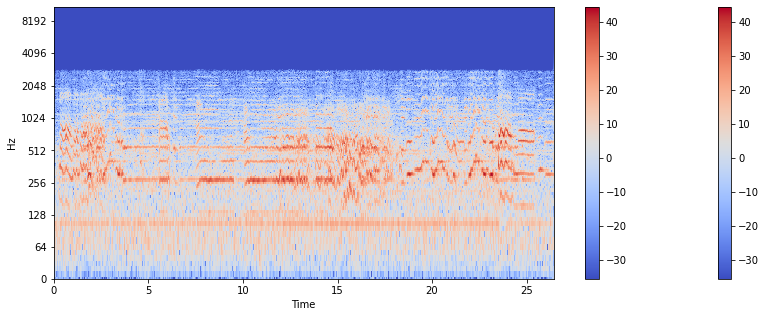

In [9]:
#Spectogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()


In [10]:
#audio widget
import IPython.display as ipd
ipd.Audio(audio_data)


In [15]:
#creating an Audio signal
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array
#Saving the audio
librosa.output.write_wav('tone_220.wav', x, sr)

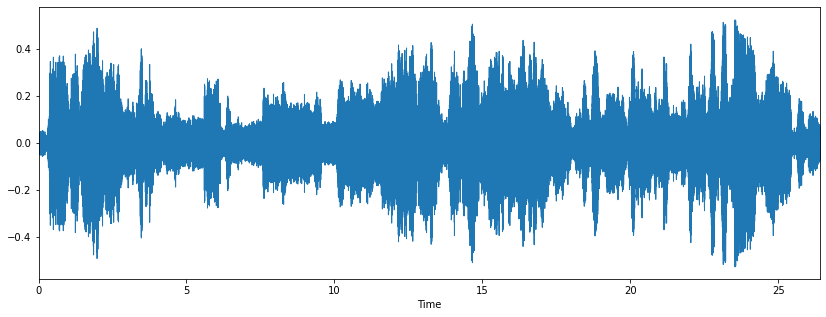

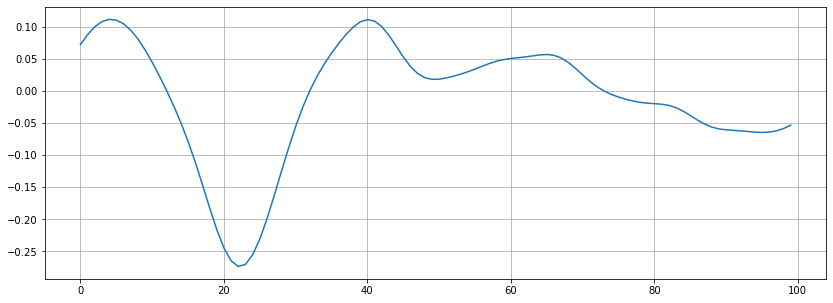

In [17]:
#Feature extraction
# 1.Zero Crossing Rate : The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back.
# Load the signal
x, sr = librosa.load('../DeepLearningMusic/kalyani/1.wav')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [18]:
#2. Spectral Centroid: It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

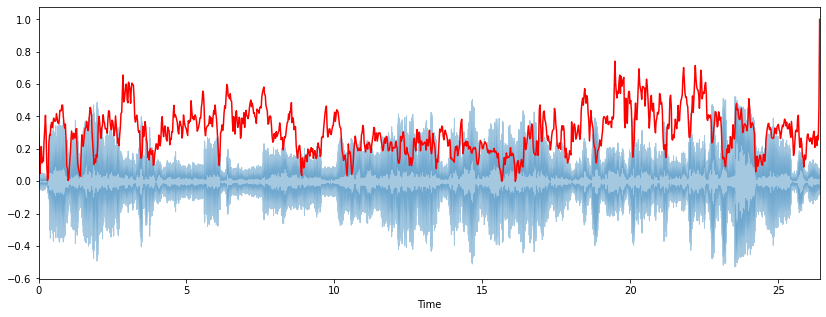

In [19]:

# Normalising the spectral centroid for visualisation
plt.figure(figsize=(14, 5))
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

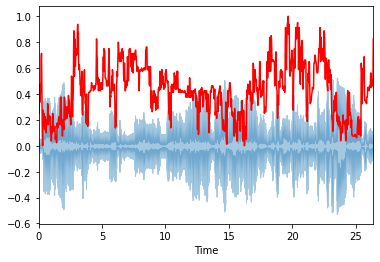

In [21]:
#3. Spectral Rolloff
#It is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy.
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

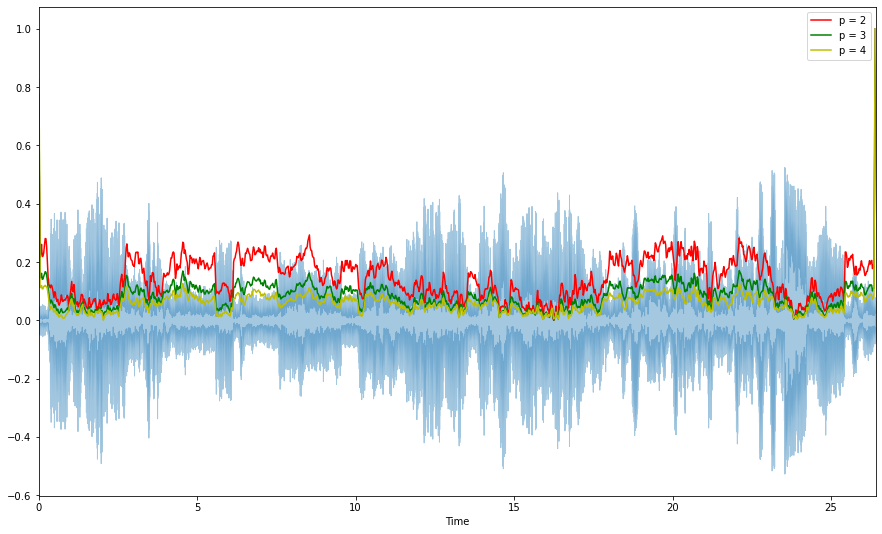

In [22]:
#4. Spectral Bandwidth
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

(20, 1138)


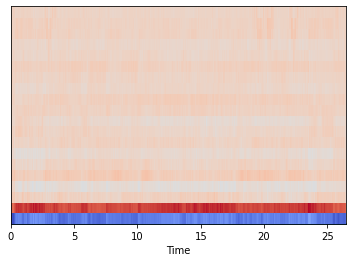

In [25]:

#4. Mel-Frequency Cepstral Coefficients : The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.
x, fs = librosa.load('../DeepLearningMusic/kalyani/1.wav')
librosa.display.waveplot(x, sr=sr)
mfccs = librosa.feature.mfcc(x, sr=fs)
print (mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')


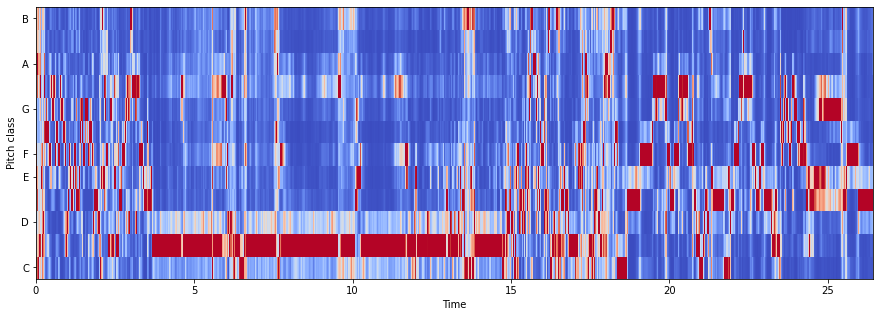

In [26]:
#5. Chroma Frequencies : Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.
# Loadign the file
x, sr = librosa.load('../DeepLearningMusic/kalyani/1.wav')
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')


# The actual start of model building using all the datasets

In [6]:
"""
In his section, we will model a classifier to classify songs into different genres. Let us assume a scenario in which, for some reason, we find a bunch of randomly named MP3 files on our hard disk, which are assumed to contain music. Our task is to sort them according to the music genre into different folders such as jazz, classical, country, pop, rock, and metal.
Dataset
"""
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display
import pandas as pd
import random
import warnings
import os
from PIL import Image
import pathlib
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [7]:
#Keras
import keras
import warnings
warnings.filterwarnings('ignore')
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv1D, Conv2D, Flatten, BatchNormalization, ZeroPadding2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras.models import Sequential
from keras import regularizers
from keras.optimizers import SGD
import keras.backend as K
from keras.models import load_model
from keras.callbacks import EarlyStopping


In [8]:
"""
Extracting music and features
Dataset
We use GTZAN genre collection dataset for classification.
The dataset consists of 10 genres i.e
Blues Classical Country Disco Hiphop Jazz Metal Pop Reggae Rock
Each genre contains 100 songs. Total dataset: 1000 songs
"""
""" Extracting the Spectrogram for every Audio """

cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
genres = 'kalyani shankarabharana'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'../DeepLearningMusic/{g}'):
        songname = f'../DeepLearningMusic/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        print(y.shape)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()


(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)
(110250,)


<Figure size 576x576 with 0 Axes>

In [9]:
"""
All the audio files get converted into their respective spectrograms .WE can noe easily extract features from them.
"""
"""
Extracting features from Spectrogram and they are:
Mel-frequency cepstral coefficients (MFCC)(20 in number)
Spectral Centroid,
Zero Crossing Rate
Chroma Frequencies
Spectral Roll-off.
"""

header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [11]:
#We write the data to a csv file

file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'kalyani shankarabharana'.split()
for g in genres:
    for filename in os.listdir(f'../DeepLearningMusic/{g}'):
        songname = f'../DeepLearningMusic/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rms(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [12]:
#Analysing the Data in Pandas¶
data = pd.read_csv('dataset.csv')
data.head()
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
#Encoding the Labels¶
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
#Scaling the Feature columns¶
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
#Dividing data into training and Testing set¶
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [21]:
#ANN implementation
from keras import layers
from keras import layers
import keras
from keras.models import Sequential
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128)

test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

Epoch 1/20
1/1 [==============================] - 0s 1ms/step - loss: 2.1300 - accuracy: 0.2466
Epoch 2/20
1/1 [==============================] - 0s 998us/step - loss: 1.8886 - accuracy: 0.7808
Epoch 3/20
1/1 [==============================] - 0s 974us/step - loss: 1.6656 - accuracy: 0.9178
Epoch 4/20
1/1 [==============================] - 0s 975us/step - loss: 1.4565 - accuracy: 0.9315
Epoch 5/20
1/1 [==============================] - 0s 951us/step - loss: 1.2572 - accuracy: 0.9315
Epoch 6/20
1/1 [==============================] - 0s 1ms/step - loss: 1.0623 - accuracy: 0.9315
Epoch 7/20
1/1 [==============================] - 0s 2ms/step - loss: 0.8746 - accuracy: 0.9452
Epoch 8/20
1/1 [==============================] - 0s 4ms/step - loss: 0.7040 - accuracy: 0.9726
Epoch 9/20
1/1 [==============================] - 0s 2ms/step - loss: 0.5538 - accuracy: 0.9863
Epoch 10/20
1/1 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.9726
Epoch 11/20
1/1 [==============

In [24]:
#Validating our approach¶
x_val = X_train[:200]
partial_x_train = X_train[200:]

y_val = y_train[:200]
partial_y_train = y_train[200:]

model = Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=30,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(X_test, y_test)

Epoch 1/30


UnboundLocalError: local variable 'logs' referenced before assignment

In [17]:
#Predictions on Test Data¶
predictions = model.predict(X_test)

In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets